# **Recurrent Neural Network**

### **Loading Libraries**

In [1]:
# Numerical Computing
import numpy as np

# Data Manipulation
import pandas as pd

# Data Visualization
import seaborn as sns
import matplotlib
import matplotlib_inline
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow

# Dataset's Iteration Performance
from tqdm import tqdm

# Time
import time

# OS
import sys
import string
import unicodedata
import requests, zipfile, io

# SciPy
from scipy.signal import convolve

# PyTorch
import torch
import torchvision
import torch.nn as nn
from torch.utils.data import *
import torch.nn.functional as F
from torchvision import transforms
from torch.utils.data import Dataset, DataLoader


# IDLMAM Libraries
from idlmam import moveTo
from idlmam import train_simple_network, set_seed, Flatten, weight_reset

# Scikit-Learn
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

#### *Setting Seeds*

In [2]:
torch.backends.cudnn.deterministic=True

set_seed(42)

In [3]:
device = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")

### **Recurrent Neural Networks**

#### *Weight Sharing for a Fully Connected Network*

In [4]:
mnist_data_train = torchvision.datasets.MNIST("./data", train=True, download=True, transform=transforms.ToTensor())
mnist_data_test = torchvision.datasets.MNIST("./data", train=False, download=True, transform=transforms.ToTensor())

mnist_train_loader = DataLoader(mnist_data_train, batch_size=64, shuffle=True)
mnist_test_loader = DataLoader(mnist_data_test, batch_size=64)

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 9912422/9912422 [00:00<00:00, 16044524.58it/s]


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 28881/28881 [00:00<00:00, 467342.69it/s]


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 1648877/1648877 [00:00<00:00, 4535468.76it/s]


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 4542/4542 [00:00<00:00, 11644577.49it/s]

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



In [5]:
# Image Size
D = 28*28 

# Hidden Layers
n = 256

# Channels
C = 1

# Classes
classes = 10

# Setting Regular Model
model_regular = nn.Sequential(
  Flatten(),
  nn.Linear(D, n),
  nn.Tanh(),
  nn.Linear(n, n),
  nn.Tanh(),
  nn.Linear(n, n),
  nn.Tanh(),
  nn.Linear(n, classes),
)

In [6]:
# SettingLoss Function
loss_func = nn.CrossEntropyLoss()

# Setting Model Training
regular_results = train_simple_network(model_regular,
                                       loss_func, mnist_train_loader,
                                       test_loader=mnist_test_loader,
                                       score_funcs={'Accuracy': accuracy_score},
                                       device=device, epochs=10)

Epoch:   0%|          | 0/10 [00:00<?, ?it/s]

Training:   0%|          | 0/938 [00:00<?, ?it/s]

Testing:   0%|          | 0/157 [00:00<?, ?it/s]

Training:   0%|          | 0/938 [00:00<?, ?it/s]

Testing:   0%|          | 0/157 [00:00<?, ?it/s]

Training:   0%|          | 0/938 [00:00<?, ?it/s]

Testing:   0%|          | 0/157 [00:00<?, ?it/s]

Training:   0%|          | 0/938 [00:00<?, ?it/s]

Testing:   0%|          | 0/157 [00:00<?, ?it/s]

Training:   0%|          | 0/938 [00:00<?, ?it/s]

Testing:   0%|          | 0/157 [00:00<?, ?it/s]

Training:   0%|          | 0/938 [00:00<?, ?it/s]

Testing:   0%|          | 0/157 [00:00<?, ?it/s]

Training:   0%|          | 0/938 [00:00<?, ?it/s]

Testing:   0%|          | 0/157 [00:00<?, ?it/s]

Training:   0%|          | 0/938 [00:00<?, ?it/s]

Testing:   0%|          | 0/157 [00:00<?, ?it/s]

Training:   0%|          | 0/938 [00:00<?, ?it/s]

Testing:   0%|          | 0/157 [00:00<?, ?it/s]

Training:   0%|          | 0/938 [00:00<?, ?it/s]

Testing:   0%|          | 0/157 [00:00<?, ?it/s]

In [7]:
# Weight's Layer
h_2 = nn.Linear(n, n)

model_shared = nn.Sequential(
  Flatten(),
  nn.Linear(D, n),
  nn.Tanh(),
  h_2, 
  nn.Tanh(),
  h_2, 
  nn.Tanh(),
  nn.Linear(n, classes),
)

In [8]:
shared_results = train_simple_network(model_shared,
                                      loss_func,
                                      mnist_train_loader,
                                      test_loader=mnist_test_loader,
                                      score_funcs={'Accuracy': accuracy_score},
                                      device=device, epochs=10)

Epoch:   0%|          | 0/10 [00:00<?, ?it/s]

Training:   0%|          | 0/938 [00:00<?, ?it/s]

Testing:   0%|          | 0/157 [00:00<?, ?it/s]

Training:   0%|          | 0/938 [00:00<?, ?it/s]

Testing:   0%|          | 0/157 [00:00<?, ?it/s]

Training:   0%|          | 0/938 [00:00<?, ?it/s]

Testing:   0%|          | 0/157 [00:00<?, ?it/s]

Training:   0%|          | 0/938 [00:00<?, ?it/s]

Testing:   0%|          | 0/157 [00:00<?, ?it/s]

Training:   0%|          | 0/938 [00:00<?, ?it/s]

Testing:   0%|          | 0/157 [00:00<?, ?it/s]

Training:   0%|          | 0/938 [00:00<?, ?it/s]

Testing:   0%|          | 0/157 [00:00<?, ?it/s]

Training:   0%|          | 0/938 [00:00<?, ?it/s]

Testing:   0%|          | 0/157 [00:00<?, ?it/s]

Training:   0%|          | 0/938 [00:00<?, ?it/s]

Testing:   0%|          | 0/157 [00:00<?, ?it/s]

Training:   0%|          | 0/938 [00:00<?, ?it/s]

Testing:   0%|          | 0/157 [00:00<?, ?it/s]

Training:   0%|          | 0/938 [00:00<?, ?it/s]

Testing:   0%|          | 0/157 [00:00<?, ?it/s]

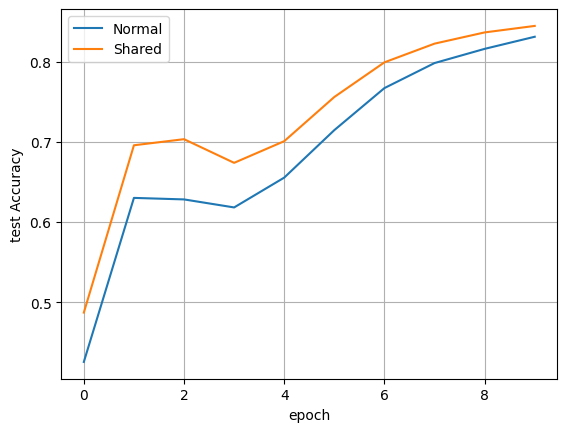

In [9]:
# Normal Vs. Shared
sns.lineplot(x='epoch', y='test Accuracy', data=regular_results, label='Normal')
sns.lineplot(x='epoch', y='test Accuracy', data=shared_results, label='Shared')
plt.grid(True)
plt.show()

#### Weight Sharing over Time

In [10]:
zip_file_url = "https://download.pytorch.org/tutorial/data.zip"


r = requests.get(zip_file_url)
z = zipfile.ZipFile(io.BytesIO(r.content))
z.extractall()

### RNN's in PyTorch

#### Asimple Sequence Classification Problem

In [12]:
namge_language_data = {}

# Removing UNICODE 
all_letters = string.ascii_letters + " .,;'"
n_letters = len(all_letters)
alphabet = {}
for i in range(n_letters):
    alphabet[all_letters[i]] = i


def unicodeToAscii(s):
    return ''.join(
        c for c in unicodedata.normalize('NFD', s)
        if unicodedata.category(c) != 'Mn'
        and c in all_letters
    )


for zip_path in z.namelist():
    if "data/names/" in zip_path and zip_path.endswith(".txt"):
        lang = zip_path[len("data/names/"):-len(".txt")]
        with z.open(zip_path) as myfile:
            lang_names = [unicodeToAscii(line).lower() for line in str(myfile.read(), encoding='utf-8').strip().split("\n")]
            namge_language_data[lang] = lang_names
        print(lang, ": ", len(lang_names)) #Print out the name of each language too.

Arabic :  2000
Chinese :  268
Czech :  519
Dutch :  297
English :  3668
French :  277
German :  724
Greek :  203
Irish :  232
Italian :  709
Japanese :  991
Korean :  94
Polish :  139
Portuguese :  74
Russian :  9408
Scottish :  100
Spanish :  298
Vietnamese :  73


In [13]:
class LanguageNameDataset(Dataset):

    def __init__(self, lang_name_dict, vocabulary):
        self.label_names = [x for x in lang_name_dict.keys()]
        self.data = []
        self.labels = []
        self.vocabulary = vocabulary
        for y, language in enumerate(self.label_names):
            for sample in lang_name_dict[language]:
                self.data.append(sample)
                self.labels.append(y)

    def __len__(self):
        return len(self.data)

    def string2InputVec(self, input_string):
        T = len(input_string) 
        name_vec = torch.zeros((T), dtype=torch.long)
        for pos, character in enumerate(input_string):
            name_vec[pos] = self.vocabulary[character]

        return name_vec

    def __getitem__(self, idx):
        name = self.data[idx]
        label = self.labels[idx]
        label_vec = torch.tensor([label], dtype=torch.long)

        return self.string2InputVec(name), label

In [14]:
dataset = LanguageNameDataset(namge_language_data, alphabet)

train_data, test_data = torch.utils.data.random_split(dataset, (len(dataset)-300, 300))
train_loader = DataLoader(train_data, batch_size=1, shuffle=True)
test_loader = DataLoader(test_data, batch_size=1, shuffle=False)

#### Embedding Layers

In [18]:
with torch.no_grad():
    input_sequence = torch.tensor([0, 1, 1, 0, 2], dtype=torch.long)
    embd = nn.Embedding(3, 2)
    x_seq = embd(input_sequence)
    print(input_sequence.shape, x_seq.shape)
    print(x_seq)

torch.Size([5]) torch.Size([5, 2])
tensor([[-0.5369,  0.2896],
        [ 0.5354, -1.4354],
        [ 0.5354, -1.4354],
        [-0.5369,  0.2896],
        [ 1.5899, -0.8454]])


In [19]:
class LastTimeStep(nn.Module):
    def __init__(self, rnn_layers=1, bidirectional=False):
        super(LastTimeStep, self).__init__()
        self.rnn_layers = rnn_layers
        if bidirectional:
            self.num_driections = 2
        else:
            self.num_driections = 1

    def forward(self, input):
        rnn_output = input[0]
        last_step = input[1] 
        if(type(last_step) == tuple):
            last_step = last_step[0]
        batch_size = last_step.shape[1] 
        # reshaping so that everything is separate
        last_step = last_step.view(self.rnn_layers, self.num_driections, batch_size, -1)
        last_step = last_step[self.rnn_layers-1]
        last_step = last_step.permute(1, 0, 2)
        return last_step.reshape(batch_size, -1)

In [20]:
D = 64
vocab_size = len(all_letters)
hidden_nodes = 256
classes = len(dataset.label_names)

first_rnn = nn.Sequential(
  nn.Embedding(vocab_size, D), #(B, T) -> (B, T, D)
  nn.RNN(D, hidden_nodes, batch_first=True), #(B, T, D) -> ( (B,T,D) , (S, B, D)  )
  #the tanh activation is built into the RNN object, so we don't need to do it here
  LastTimeStep(), #We need to take the RNN output and reduce it to one item, (B, D)
  nn.Linear(hidden_nodes, classes), #(B, D) -> (B, classes)
)

In [21]:
loss_func = nn.CrossEntropyLoss()

batch_one_train = train_simple_network(first_rnn,
                                       loss_func,
                                       train_loader,
                                       test_loader=test_loader,
                                       score_funcs={'Accuracy': accuracy_score},
                                       device=device, epochs=5)

Epoch:   0%|          | 0/5 [00:00<?, ?it/s]

Training:   0%|          | 0/19774 [00:00<?, ?it/s]

Testing:   0%|          | 0/300 [00:00<?, ?it/s]

Training:   0%|          | 0/19774 [00:00<?, ?it/s]

Testing:   0%|          | 0/300 [00:00<?, ?it/s]

Training:   0%|          | 0/19774 [00:00<?, ?it/s]

Testing:   0%|          | 0/300 [00:00<?, ?it/s]

Training:   0%|          | 0/19774 [00:00<?, ?it/s]

Testing:   0%|          | 0/300 [00:00<?, ?it/s]

Training:   0%|          | 0/19774 [00:00<?, ?it/s]

Testing:   0%|          | 0/300 [00:00<?, ?it/s]

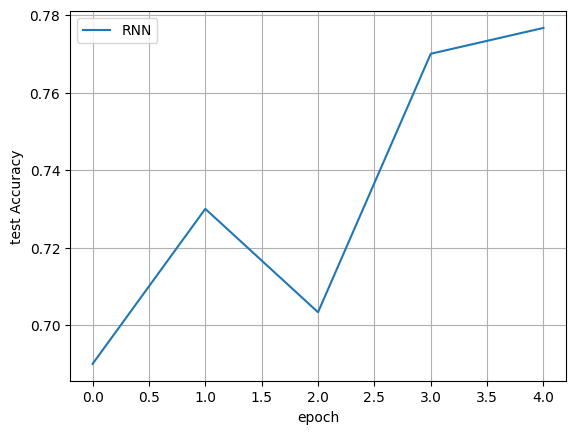

In [24]:
sns.lineplot(x='epoch', y='test Accuracy', data=batch_one_train, label='RNN')
plt.grid(True)
plt.show()

In [25]:
pred_rnn = first_rnn.to("cpu").eval()

with torch.no_grad():
    preds = F.softmax(pred_rnn(dataset.string2InputVec("frank").reshape(1,-1)), dim=-1)
    for class_id in range(len(dataset.label_names)):
        print(dataset.label_names[class_id], ":", preds[0,class_id].item()*100 , "%")

Arabic : 0.0018228009139420465 %
Chinese : 0.19452437991276383 %
Czech : 9.697586297988892 %
Dutch : 5.459129810333252 %
English : 43.00113022327423 %
French : 0.3972738981246948 %
German : 33.327460289001465 %
Greek : 0.010382477194070816 %
Irish : 1.8502810969948769 %
Italian : 0.31586335971951485 %
Japanese : 0.0029378496037679724 %
Korean : 0.5725219380110502 %
Polish : 1.4162305742502213 %
Portuguese : 0.10697183897718787 %
Russian : 0.9030868299305439 %
Scottish : 2.0368626341223717 %
Spanish : 0.22299820557236671 %
Vietnamese : 0.48293848522007465 %


### **Improving Training Time with Packing**

#### Pad & Pack

In [28]:
def pad_and_pack(batch):
    input_tensors = []
    labels = []
    lengths = []
    for x, y in batch:
        input_tensors.append(x)
        labels.append(y)
        lengths.append(x.shape[0])
    x_padded = torch.nn.utils.rnn.pad_sequence(input_tensors, batch_first=False)
    x_packed = torch.nn.utils.rnn.pack_padded_sequence(x_padded, lengths, batch_first=False, enforce_sorted=False)
    y_batched = torch.as_tensor(labels, dtype=torch.long)
    return x_packed, y_batched

#### **Packed Embedding Layer**

In [29]:
class EmbeddingPackable(nn.Module):
    """
    The embedding layer in PyTorch does not support Packed Sequence objects.
    This wrapper class will fix that. If a normal input comes in, it will
    use the regular Embedding layer. Otherwise, it will work on the packed
    sequence to return a new Packed sequence of the appropriate result.
    """
    def __init__(self, embd_layer):
        super(EmbeddingPackable, self).__init__()
        self.embd_layer = embd_layer

    def forward(self, input):
        if type(input) == torch.nn.utils.rnn.PackedSequence:
            # We need to unpack the input,
            sequences, lengths = torch.nn.utils.rnn.pad_packed_sequence(input.cpu(), batch_first=True)
            #Embed it
            sequences = self.embd_layer(sequences.to(input.data.device))
            #And pack it into a new sequence
            return torch.nn.utils.rnn.pack_padded_sequence(sequences, lengths.cpu(),
                                                           batch_first=True, enforce_sorted=False)
        else:#apply to normal data
            return self.embd_layer(input)

#### **Training a Batched RNN**

In [30]:
B = 16

train_loader = DataLoader(train_data,
                          batch_size=B,
                          shuffle=True,
                          collate_fn=pad_and_pack)

test_loader = DataLoader(test_data,
                         batch_size=B,
                         shuffle=False,
                         collate_fn=pad_and_pack)

In [31]:
rnn_packed = nn.Sequential(
  EmbeddingPackable(nn.Embedding(vocab_size, D)),
  nn.RNN(D, hidden_nodes, batch_first=True),
  LastTimeStep(),
  nn.Linear(hidden_nodes, classes),
)

rnn_packed.to(device)

Sequential(
  (0): EmbeddingPackable(
    (embd_layer): Embedding(57, 64)
  )
  (1): RNN(64, 256, batch_first=True)
  (2): LastTimeStep()
  (3): Linear(in_features=256, out_features=18, bias=True)
)

In [32]:
packed_train = train_simple_network(rnn_packed,
                                    loss_func,
                                    train_loader,
                                    test_loader=test_loader,
                                    score_funcs={'Accuracy': accuracy_score},
                                    device=device, epochs=20)

Epoch:   0%|          | 0/20 [00:00<?, ?it/s]

Training:   0%|          | 0/1236 [00:00<?, ?it/s]

Testing:   0%|          | 0/19 [00:00<?, ?it/s]

Training:   0%|          | 0/1236 [00:00<?, ?it/s]

Testing:   0%|          | 0/19 [00:00<?, ?it/s]

Training:   0%|          | 0/1236 [00:00<?, ?it/s]

Testing:   0%|          | 0/19 [00:00<?, ?it/s]

Training:   0%|          | 0/1236 [00:00<?, ?it/s]

Testing:   0%|          | 0/19 [00:00<?, ?it/s]

Training:   0%|          | 0/1236 [00:00<?, ?it/s]

Testing:   0%|          | 0/19 [00:00<?, ?it/s]

Training:   0%|          | 0/1236 [00:00<?, ?it/s]

Testing:   0%|          | 0/19 [00:00<?, ?it/s]

Training:   0%|          | 0/1236 [00:00<?, ?it/s]

Testing:   0%|          | 0/19 [00:00<?, ?it/s]

Training:   0%|          | 0/1236 [00:00<?, ?it/s]

Testing:   0%|          | 0/19 [00:00<?, ?it/s]

Training:   0%|          | 0/1236 [00:00<?, ?it/s]

Testing:   0%|          | 0/19 [00:00<?, ?it/s]

Training:   0%|          | 0/1236 [00:00<?, ?it/s]

Testing:   0%|          | 0/19 [00:00<?, ?it/s]

Training:   0%|          | 0/1236 [00:00<?, ?it/s]

Testing:   0%|          | 0/19 [00:00<?, ?it/s]

Training:   0%|          | 0/1236 [00:00<?, ?it/s]

Testing:   0%|          | 0/19 [00:00<?, ?it/s]

Training:   0%|          | 0/1236 [00:00<?, ?it/s]

Testing:   0%|          | 0/19 [00:00<?, ?it/s]

Training:   0%|          | 0/1236 [00:00<?, ?it/s]

Testing:   0%|          | 0/19 [00:00<?, ?it/s]

Training:   0%|          | 0/1236 [00:00<?, ?it/s]

Testing:   0%|          | 0/19 [00:00<?, ?it/s]

Training:   0%|          | 0/1236 [00:00<?, ?it/s]

Testing:   0%|          | 0/19 [00:00<?, ?it/s]

Training:   0%|          | 0/1236 [00:00<?, ?it/s]

Testing:   0%|          | 0/19 [00:00<?, ?it/s]

Training:   0%|          | 0/1236 [00:00<?, ?it/s]

Testing:   0%|          | 0/19 [00:00<?, ?it/s]

Training:   0%|          | 0/1236 [00:00<?, ?it/s]

Testing:   0%|          | 0/19 [00:00<?, ?it/s]

Training:   0%|          | 0/1236 [00:00<?, ?it/s]

Testing:   0%|          | 0/19 [00:00<?, ?it/s]

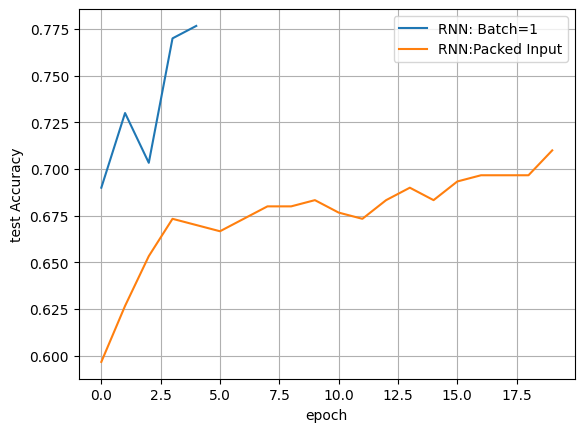

In [34]:
sns.lineplot(x='epoch', y='test Accuracy', data=batch_one_train, label='RNN: Batch=1')
sns.lineplot(x='epoch', y='test Accuracy', data=packed_train, label='RNN:Packed Input')
plt.grid(True)
plt.show()

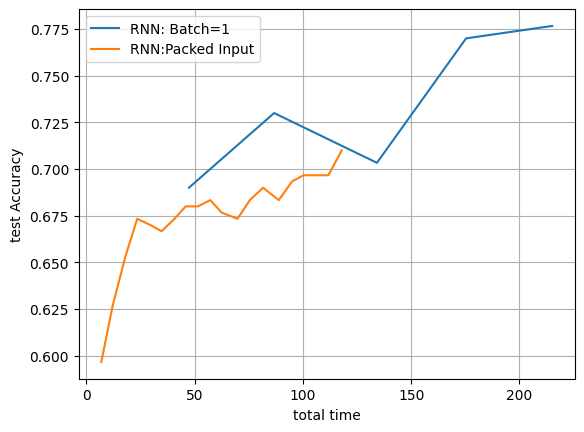

In [36]:
sns.lineplot(x='total time', y='test Accuracy', data=batch_one_train, label='RNN: Batch=1')
sns.lineplot(x='total time', y='test Accuracy', data=packed_train, label='RNN:Packed Input')
plt.grid(True)
plt.show()

#### **Simultaneous Packed & Unpacked Inputs**

In [37]:
pred_rnn = rnn_packed.to("cpu").eval()

with torch.no_grad():
    preds = F.softmax(pred_rnn(dataset.string2InputVec("frank").reshape(1,-1)), dim=-1)
    for class_id in range(len(dataset.label_names)):
        print(dataset.label_names[class_id], ":", preds[0,class_id].item()*100 , "%")

Arabic : 0.2597406506538391 %
Chinese : 0.6819739006459713 %
Czech : 9.369000792503357 %
Dutch : 4.635278135538101 %
English : 49.22299385070801 %
French : 2.721945196390152 %
German : 15.548191964626312 %
Greek : 0.2534073544666171 %
Irish : 1.767730712890625 %
Italian : 4.105750471353531 %
Japanese : 0.36168673541396856 %
Korean : 0.6711915601044893 %
Polish : 2.7260037139058113 %
Portuguese : 0.6627304013818502 %
Russian : 4.155164957046509 %
Scottish : 1.1826063506305218 %
Spanish : 1.060973759740591 %
Vietnamese : 0.6136354990303516 %


### **More Complex RNN's**

#### **Multiple Layers**

In [38]:
rnn_3layer = nn.Sequential(
  EmbeddingPackable(nn.Embedding(vocab_size, D)),
  nn.RNN(D, hidden_nodes, num_layers=3, batch_first=True),
  LastTimeStep(rnn_layers=3),
  nn.Linear(hidden_nodes, classes),
)

rnn_3layer.to(device)

rnn_3layer_results = train_simple_network(rnn_3layer,
                                          loss_func, train_loader,
                                          test_loader=test_loader,
                                          score_funcs={'Accuracy': accuracy_score},
                                          device=device, epochs=20, lr=0.01)

Epoch:   0%|          | 0/20 [00:00<?, ?it/s]

Training:   0%|          | 0/1236 [00:00<?, ?it/s]

Testing:   0%|          | 0/19 [00:00<?, ?it/s]

Training:   0%|          | 0/1236 [00:00<?, ?it/s]

Testing:   0%|          | 0/19 [00:00<?, ?it/s]

Training:   0%|          | 0/1236 [00:00<?, ?it/s]

Testing:   0%|          | 0/19 [00:00<?, ?it/s]

Training:   0%|          | 0/1236 [00:00<?, ?it/s]

Testing:   0%|          | 0/19 [00:00<?, ?it/s]

Training:   0%|          | 0/1236 [00:00<?, ?it/s]

Testing:   0%|          | 0/19 [00:00<?, ?it/s]

Training:   0%|          | 0/1236 [00:00<?, ?it/s]

Testing:   0%|          | 0/19 [00:00<?, ?it/s]

Training:   0%|          | 0/1236 [00:00<?, ?it/s]

Testing:   0%|          | 0/19 [00:00<?, ?it/s]

Training:   0%|          | 0/1236 [00:00<?, ?it/s]

Testing:   0%|          | 0/19 [00:00<?, ?it/s]

Training:   0%|          | 0/1236 [00:00<?, ?it/s]

Testing:   0%|          | 0/19 [00:00<?, ?it/s]

Training:   0%|          | 0/1236 [00:00<?, ?it/s]

Testing:   0%|          | 0/19 [00:00<?, ?it/s]

Training:   0%|          | 0/1236 [00:00<?, ?it/s]

Testing:   0%|          | 0/19 [00:00<?, ?it/s]

Training:   0%|          | 0/1236 [00:00<?, ?it/s]

Testing:   0%|          | 0/19 [00:00<?, ?it/s]

Training:   0%|          | 0/1236 [00:00<?, ?it/s]

Testing:   0%|          | 0/19 [00:00<?, ?it/s]

Training:   0%|          | 0/1236 [00:00<?, ?it/s]

Testing:   0%|          | 0/19 [00:00<?, ?it/s]

Training:   0%|          | 0/1236 [00:00<?, ?it/s]

Testing:   0%|          | 0/19 [00:00<?, ?it/s]

Training:   0%|          | 0/1236 [00:00<?, ?it/s]

Testing:   0%|          | 0/19 [00:00<?, ?it/s]

Training:   0%|          | 0/1236 [00:00<?, ?it/s]

Testing:   0%|          | 0/19 [00:00<?, ?it/s]

Training:   0%|          | 0/1236 [00:00<?, ?it/s]

Testing:   0%|          | 0/19 [00:00<?, ?it/s]

Training:   0%|          | 0/1236 [00:00<?, ?it/s]

Testing:   0%|          | 0/19 [00:00<?, ?it/s]

Training:   0%|          | 0/1236 [00:00<?, ?it/s]

Testing:   0%|          | 0/19 [00:00<?, ?it/s]

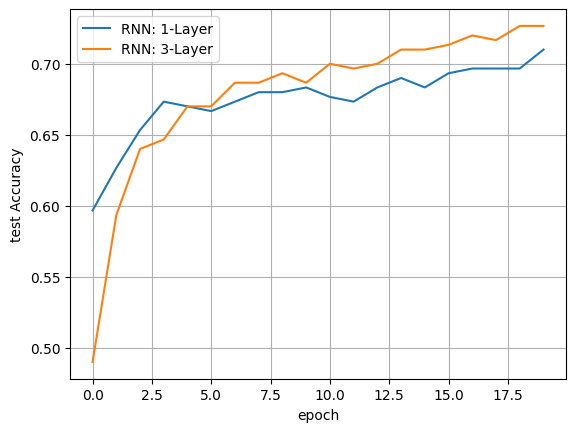

In [39]:
sns.lineplot(x='epoch', y='test Accuracy', data=packed_train, label='RNN: 1-Layer')
sns.lineplot(x='epoch', y='test Accuracy', data=rnn_3layer_results, label='RNN: 3-Layer')
plt.grid(True)
plt.show()

#### Bidirectional RNN's

In [40]:
rnn_3layer_bidir = nn.Sequential(
  EmbeddingPackable(nn.Embedding(vocab_size, D)),
  nn.RNN(D, hidden_nodes, num_layers=3, batch_first=True, bidirectional=True),
  LastTimeStep(rnn_layers=3, bidirectional=True),
  nn.Linear(hidden_nodes*2, classes),
)

rnn_3layer_bidir.to(device)

rnn_3layer_bidir_results = train_simple_network(rnn_3layer_bidir,
                                                loss_func, train_loader,
                                                test_loader=test_loader,
                                                score_funcs={'Accuracy': accuracy_score},
                                                device=device, epochs=20, lr=0.01)

Epoch:   0%|          | 0/20 [00:00<?, ?it/s]

Training:   0%|          | 0/1236 [00:00<?, ?it/s]

Testing:   0%|          | 0/19 [00:00<?, ?it/s]

Training:   0%|          | 0/1236 [00:00<?, ?it/s]

Testing:   0%|          | 0/19 [00:00<?, ?it/s]

Training:   0%|          | 0/1236 [00:00<?, ?it/s]

Testing:   0%|          | 0/19 [00:00<?, ?it/s]

Training:   0%|          | 0/1236 [00:00<?, ?it/s]

Testing:   0%|          | 0/19 [00:00<?, ?it/s]

Training:   0%|          | 0/1236 [00:00<?, ?it/s]

Testing:   0%|          | 0/19 [00:00<?, ?it/s]

Training:   0%|          | 0/1236 [00:00<?, ?it/s]

Testing:   0%|          | 0/19 [00:00<?, ?it/s]

Training:   0%|          | 0/1236 [00:00<?, ?it/s]

Testing:   0%|          | 0/19 [00:00<?, ?it/s]

Training:   0%|          | 0/1236 [00:00<?, ?it/s]

Testing:   0%|          | 0/19 [00:00<?, ?it/s]

Training:   0%|          | 0/1236 [00:00<?, ?it/s]

Testing:   0%|          | 0/19 [00:00<?, ?it/s]

Training:   0%|          | 0/1236 [00:00<?, ?it/s]

Testing:   0%|          | 0/19 [00:00<?, ?it/s]

Training:   0%|          | 0/1236 [00:00<?, ?it/s]

Testing:   0%|          | 0/19 [00:00<?, ?it/s]

Training:   0%|          | 0/1236 [00:00<?, ?it/s]

Testing:   0%|          | 0/19 [00:00<?, ?it/s]

Training:   0%|          | 0/1236 [00:00<?, ?it/s]

Testing:   0%|          | 0/19 [00:00<?, ?it/s]

Training:   0%|          | 0/1236 [00:00<?, ?it/s]

Testing:   0%|          | 0/19 [00:00<?, ?it/s]

Training:   0%|          | 0/1236 [00:00<?, ?it/s]

Testing:   0%|          | 0/19 [00:00<?, ?it/s]

Training:   0%|          | 0/1236 [00:00<?, ?it/s]

Testing:   0%|          | 0/19 [00:00<?, ?it/s]

Training:   0%|          | 0/1236 [00:00<?, ?it/s]

Testing:   0%|          | 0/19 [00:00<?, ?it/s]

Training:   0%|          | 0/1236 [00:00<?, ?it/s]

Testing:   0%|          | 0/19 [00:00<?, ?it/s]

Training:   0%|          | 0/1236 [00:00<?, ?it/s]

Testing:   0%|          | 0/19 [00:00<?, ?it/s]

Training:   0%|          | 0/1236 [00:00<?, ?it/s]

Testing:   0%|          | 0/19 [00:00<?, ?it/s]

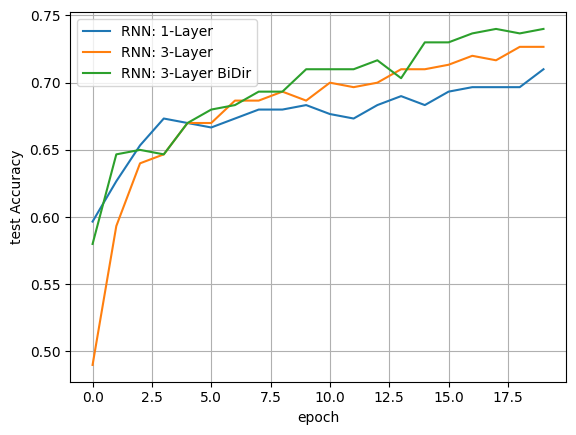

In [41]:
sns.lineplot(x='epoch', y='test Accuracy', data=packed_train, label='RNN: 1-Layer')
sns.lineplot(x='epoch', y='test Accuracy', data=rnn_3layer_results, label='RNN: 3-Layer')
sns.lineplot(x='epoch', y='test Accuracy', data=rnn_3layer_bidir_results, label='RNN: 3-Layer BiDir')
plt.grid(True)
plt.show()